In [ ]:
!git clone https://huggingface.co/spaces/depth-anything/Depth-Anything-V2

Cloning into 'Depth-Anything-V2'...
remote: Enumerating objects: 154, done.
remote: Total 154 (delta 0), reused 0 (delta 0), pack-reused 154 (from 1)
Receiving objects: 100% (154/154), 7.75 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/Depth-Anything-V2

app.py	assets	depth_anything_v2  README.md  requirements.txt


In [ ]:
!pip install -r /content/Depth-Anything-V2/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successf

<ipython-input-9-15c870524de4>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/depth_anything_v2_vits.pth', map_location='cpu'))

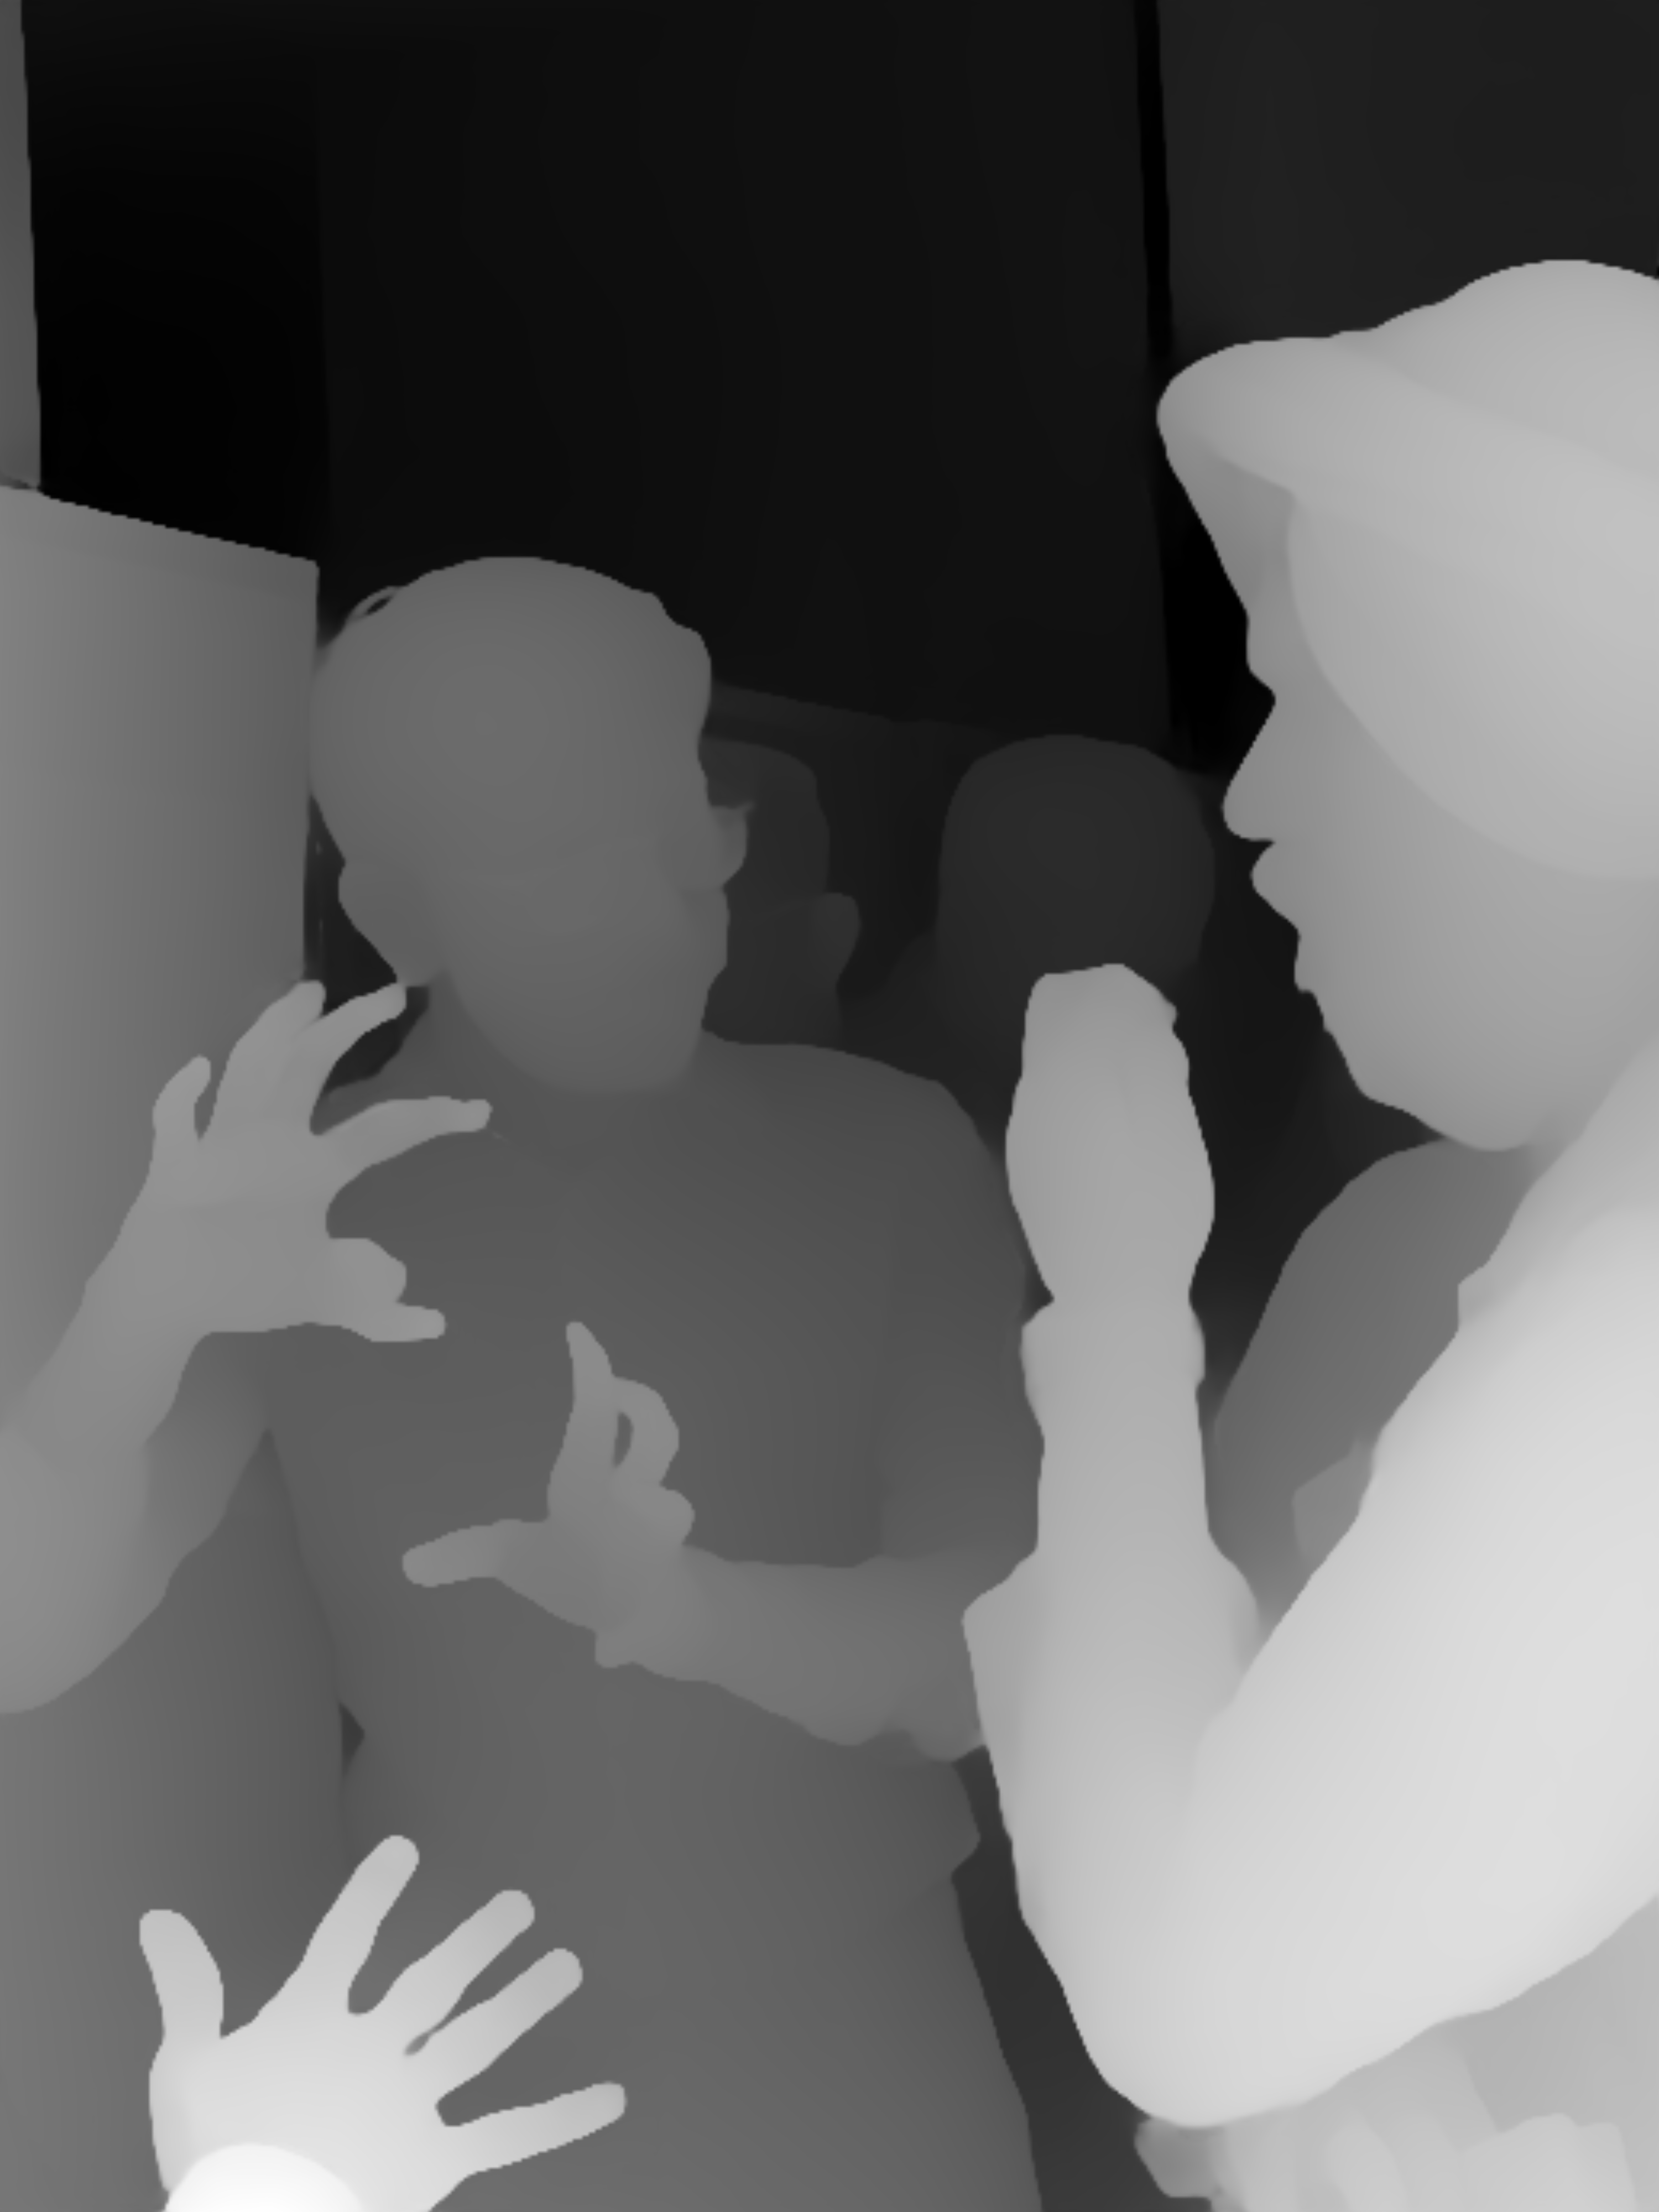

In [ ]:
import cv2
import sys
import os
import torch
from google.colab.patches import cv2_imshow

sys.path.append(os.path.abspath('/content/Depth-Anything-V2'))

from depth_anything_v2.dpt import DepthAnythingV2

# Initialize the model (using 'vitl' encoder as an example)
model = DepthAnythingV2(encoder='vits', features=64, out_channels=[48, 96, 192, 384])# encoder='vitl', features=256, out_channels=[256, 512, 1024, 1024]
model.load_state_dict(torch.load('/content/depth_anything_v2_vits.pth', map_location='cpu'))
model.eval()

# Read the image
raw_img = cv2.imread('/content/my.jpg')
img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
# Perform inference
depth = model.infer_image(img_rgb)  # HxW raw depth map

# Optionally, visualize the depth map
depth_normalized = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX)
# depth_colormap_jet = cv2.applyColorMap(depth_normalized.astype('uint8'), cv2.COLORMAP_JET)
# depth_colormap_inferno = cv2.applyColorMap(depth_normalized.astype('uint8'), cv2.COLORMAP_MAGMA) #like inferno colormap
depth_colormap_gray=depth_normalized.astype('uint8') #grayscale colormap
cv2_imshow(depth_colormap_gray)


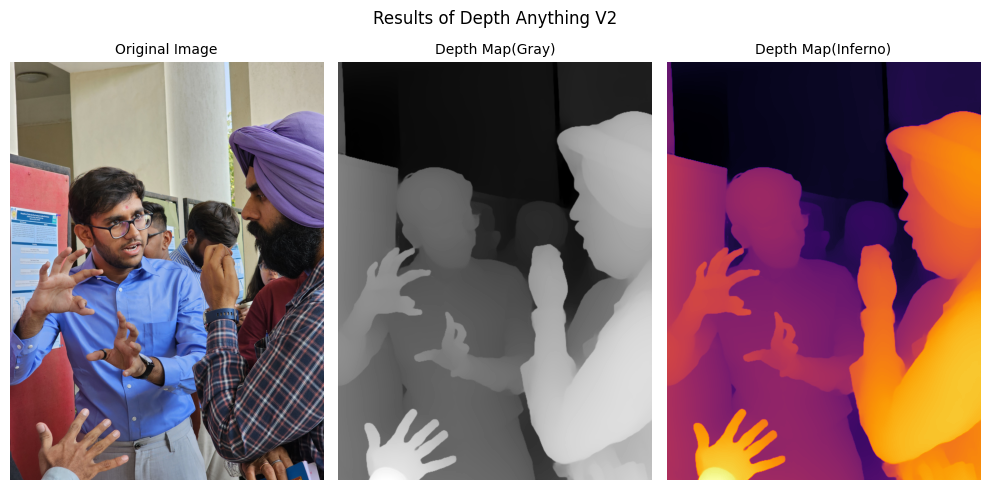

In [ ]:
# reuslts of depth_v2
plt.figure(figsize=(10, 5))  # Set the figure size

# Main title for the whole plot
plt.suptitle('Results of Depth Anything V2', fontsize=12)  # Add main title

# Subplot 1: Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb)

# Subplot 2: Grayscale Depth Map
plt.subplot(1, 3, 2)
plt.title('Depth Map(Gray)',fontsize=10)
plt.axis('off')
plt.imshow(depth_colormap_gray,cmap='gray')

# Subplot 3: Inferno Depth Map
plt.subplot(1, 3, 3)
plt.title('Depth Map(Inferno)',fontsize=10)
plt.axis('off')
plt.imshow(depth_colormap_gray,cmap='inferno')

# Adjust layout to leave space for the title
# plt.subplots_adjust(top=0.85)  # Move subplots down to make space for the suptitle
# plt.tight_layout()  # Further fine-tune spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

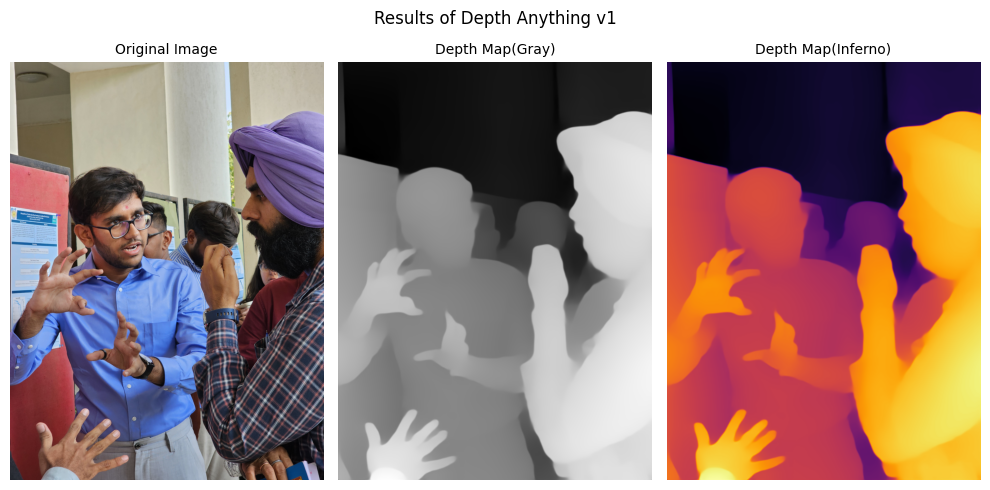

In [ ]:
# for depth anything v1
plt.figure(figsize=(10, 5))  # Set the figure size

# Main title for the whole plot
plt.suptitle('Results of Depth Anything v1', fontsize=12)  # Add main title

img1=cv2.imread('/content/my.jpg')
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2=cv2.imread('/content/My_depth_anything_v1_grayscale.png')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3=cv2.imread('/content/My_depth_anything_v1_inferno.png')
img_rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
# Subplot 1: Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb1)

# Subplot 2: Grayscale Depth Map
plt.subplot(1, 3, 2)
plt.title('Depth Map(Gray)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb2,cmap='gray')

# Subplot 3: Inferno Depth Map
plt.subplot(1, 3, 3)
plt.title('Depth Map(Inferno)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb3,cmap='inferno')

# Adjust layout to leave space for the title
# plt.subplots_adjust(top=0.85)  # Move subplots down to make space for the suptitle
# plt.tight_layout()  # Further fine-tune spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

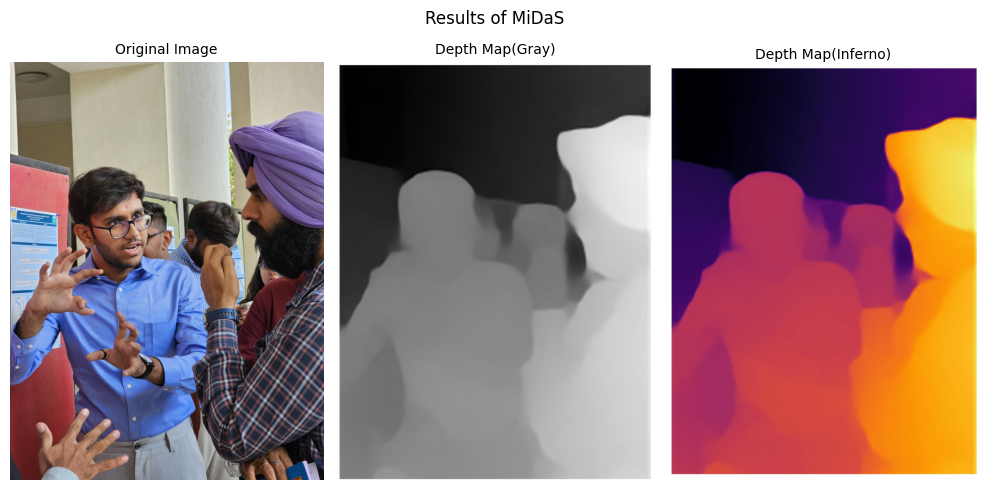

In [ ]:
# for midas
plt.figure(figsize=(10, 5))  # Set the figure size

# Main title for the whole plot
plt.suptitle('Results of MiDaS', fontsize=12)  # Add main title

img1=cv2.imread('/content/my.jpg')
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2=cv2.imread('/content/MiDaS_Gray.jpg')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3=cv2.imread('/content/MiDaS_inferno.jpg')
img_rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
# Subplot 1: Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb1)

# Subplot 2: Grayscale Depth Map
plt.subplot(1, 3, 2)
plt.title('Depth Map(Gray)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb2,cmap='gray')

# Subplot 3: Inferno Depth Map
plt.subplot(1, 3, 3)
plt.title('Depth Map(Inferno)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb3,cmap='inferno')

# Adjust layout to leave space for the title
# plt.subplots_adjust(top=0.85)  # Move subplots down to make space for the suptitle
# plt.tight_layout()  # Further fine-tune spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

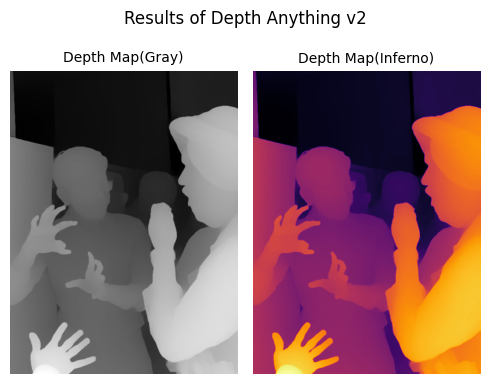

In [ ]:
# reuslts of depth_v2 -for 2 images
plt.figure(figsize=(5, 4))  # Set the figure size

# Main title for the whole plot
plt.suptitle('Results of Depth Anything v2', fontsize=12)  # Add main title

# Subplot 1: Grayscale Depth Map
plt.subplot(1, 2, 1)
plt.title('Depth Map(Gray)',fontsize=10)
plt.axis('off')
plt.imshow(depth_colormap_gray,cmap='gray')

# Subplot 2: Inferno Depth Map
plt.subplot(1, 2, 2)
plt.title('Depth Map(Inferno)',fontsize=10)
plt.axis('off')
plt.imshow(depth_colormap_gray,cmap='inferno')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

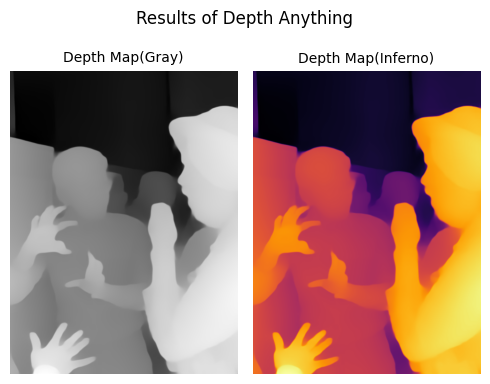

In [ ]:
# reuslts of depth_v1 -for 2 images
plt.figure(figsize=(5, 4))  # Set the figure size

# Main title for the whole plot
plt.suptitle('Results of Depth Anything', fontsize=12)  # Add main title

img1=cv2.imread('/content/My_depth_anything_v1_grayscale.png')
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2=cv2.imread('/content/My_depth_anything_v1_inferno.png')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Subplot 1: Grayscale Depth Map
plt.subplot(1, 2, 1)
plt.title('Depth Map(Gray)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb1,cmap='gray')

# Subplot 2: Inferno Depth Map
plt.subplot(1, 2, 2)
plt.title('Depth Map(Inferno)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb2,cmap='inferno')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


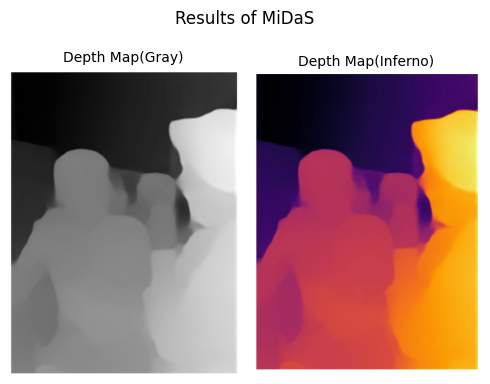

In [ ]:
# for MiDaS - 2 images
plt.figure(figsize=(5, 4))  # Set the figure size

# Main title for the whole plot
plt.suptitle('Results of MiDaS', fontsize=12)  # Add main title

img1=cv2.imread('/content/MiDaS_Gray.jpg')
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2=cv2.imread('/content/MiDaS_inferno.jpg')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Subplot 1: Grayscale Depth Map
plt.subplot(1, 2, 1)
plt.title('Depth Map(Gray)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb1,cmap='gray')

# Subplot 2: Inferno Depth Map
plt.subplot(1, 2, 2)
plt.title('Depth Map(Inferno)',fontsize=10)
plt.axis('off')
plt.imshow(img_rgb2,cmap='inferno')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()